In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Bidirectional,AveragePooling2D, LSTM, Reshape ,Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.models import Model,Sequential

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.7)

In [27]:
train_path='FER2013/train'
test_path='FER2013/test'

In [4]:
train_path='../BalancedFER2013/train'
test_path='../BalancedFER2013/test'

In [5]:
BATCH_SIZE = 32
train_generator = train_datagen.flow_from_directory(
        directory = train_path,
        target_size = (48, 48), 
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="grayscale")
test_generator = test_datagen.flow_from_directory(
        directory = test_path,
        target_size = (48, 48), 
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="grayscale",
        subset='training',
        shuffle=False)
validation_generator = test_datagen.flow_from_directory(
        directory = test_path,
        target_size = (48, 48), 
        batch_size = BATCH_SIZE,
        class_mode = 'categorical',
        color_mode="grayscale",subset='validation',
        shuffle=False
        )

Found 23251 images belonging to 7 classes.
Found 1734 images belonging to 7 classes.
Found 4038 images belonging to 7 classes.


In [6]:
classes = train_generator.num_classes
classes

7

In [10]:

ip1 = keras.layers.Input(shape = (48, 48, 1))
ip3=keras.layers.Conv2D(64, (3,3), activation = 'relu')(ip1)
ip3=keras.layers.BatchNormalization()(ip3)
#ip3=tf.nn.local_contrast_normalization(ip3)
ip4=keras.layers.MaxPooling2D((2, 2))(ip3)
ip5=keras.layers.Conv2D(64, (3,3), activation = 'relu')(ip4)
ip6=keras.layers.MaxPooling2D((2,2))(ip5)
ip7=keras.layers.Flatten()(ip6)

ip13=keras.layers.Conv2D(64, (3,3), activation = 'relu')(ip1)
ip13=keras.layers.BatchNormalization()(ip13)
ip14=keras.layers.MaxPooling2D((2, 2))(ip13)
ip15=keras.layers.Conv2D(64, (3,3), activation = 'relu')(ip14)
ip16=keras.layers.MaxPooling2D((2,2))(ip15)
ip17=keras.layers.Flatten()(ip16)

#c1=keras.layers.Add()([ip7,ip17])
c1=keras.layers.Concatenate()([ip7,ip17])
c2=keras.layers.Dense(classes, activation='softmax')(c1)
model11=keras.models.Model(inputs=ip1,outputs=c2)
model11.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 46, 46, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 46, 46, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 46, 46, 64)   256         conv2d[0][0]                     
_______________________________________________________________________________________

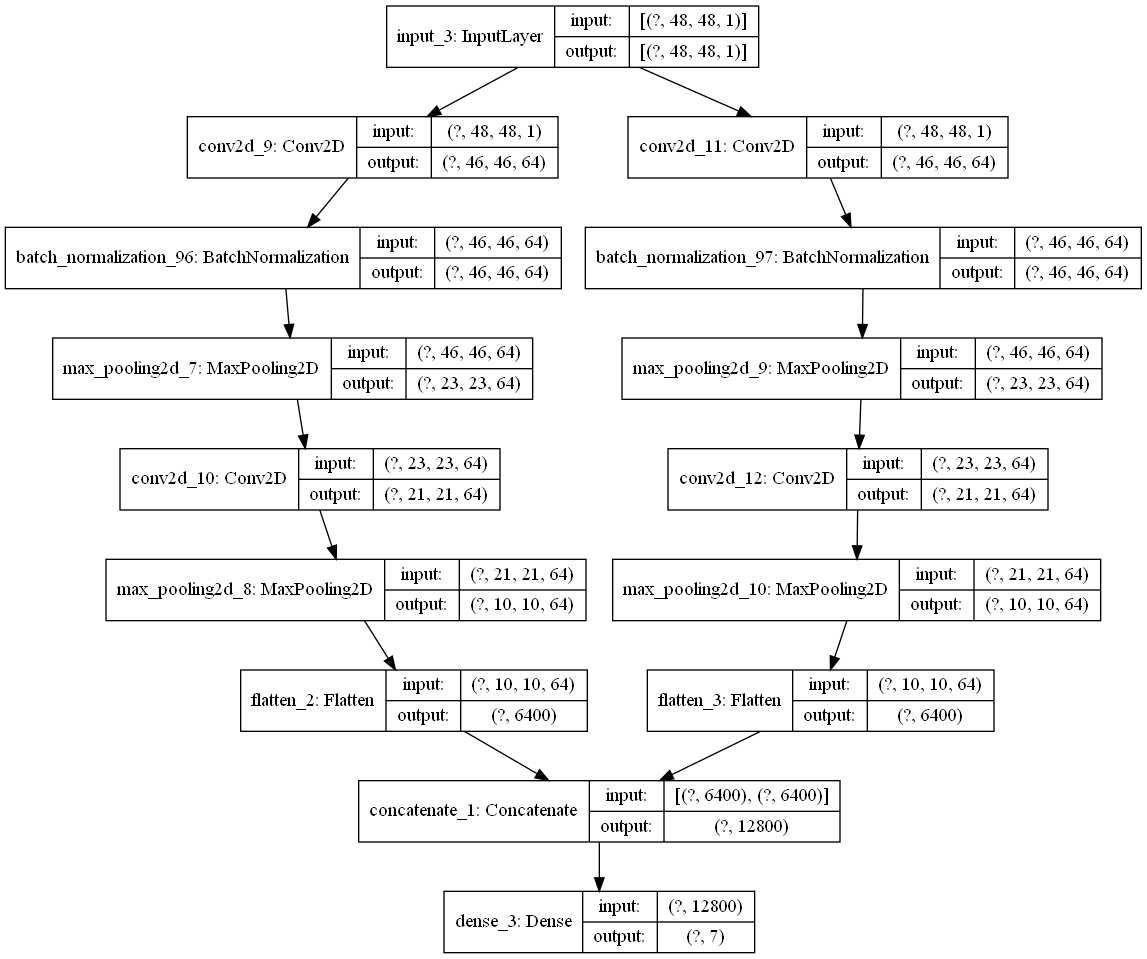

In [56]:
model11.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = 'adam',metrics=['accuracy'])
keras.utils.plot_model(model11, to_file = 'model11.png', show_shapes = True, show_layer_names = True)

In [68]:
checkpoint_path= os.path.join('checkpoint','model6.h5')
call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [69]:
EPOCHS = 10
history = model11.fit(
        train_generator,
        epochs = EPOCHS,
        validation_data = validation_generator,
        callbacks=call_back
        )

Epoch 1/10
727/727 [==============================] - ETA: 0s - loss: 1.2166 - accuracy: 0.5675
Epoch 00001: val_accuracy improved from -inf to 0.60624, saving model to checkpoint\model6.h5
727/727 [==============================] - 205s 282ms/step - loss: 1.2166 - accuracy: 0.5675 - val_loss: 1.0750 - val_accuracy: 0.6062
Epoch 2/10
727/727 [==============================] - ETA: 0s - loss: 0.9242 - accuracy: 0.6631
Epoch 00002: val_accuracy improved from 0.60624 to 0.69564, saving model to checkpoint\model6.h5
727/727 [==============================] - 176s 242ms/step - loss: 0.9242 - accuracy: 0.6631 - val_loss: 0.8223 - val_accuracy: 0.6956
Epoch 3/10
727/727 [==============================] - ETA: 0s - loss: 0.7920 - accuracy: 0.7135
Epoch 00003: val_accuracy did not improve from 0.69564
727/727 [==============================] - 207s 285ms/step - loss: 0.7920 - accuracy: 0.7135 - val_loss: 1.0154 - val_accuracy: 0.6369
Epoch 4/10
727/727 [==============================] - ETA: 0s

In [70]:
hist=model11.evaluate(test_generator)

55/55 [==============================] - 11s 207ms/step - loss: 1.5845 - accuracy: 0.6609


In [72]:
EPOCHS = 10
history = model11.fit(
        train_generator,
        epochs = EPOCHS,
        validation_data = validation_generator,
        callbacks=call_back
        )

Epoch 1/10
727/727 [==============================] - ETA: 0s - loss: 0.2907 - accuracy: 0.8932
Epoch 00001: val_accuracy did not improve from 0.69564
727/727 [==============================] - 166s 228ms/step - loss: 0.2907 - accuracy: 0.8932 - val_loss: 1.7999 - val_accuracy: 0.6240
Epoch 2/10
727/727 [==============================] - ETA: 0s - loss: 0.2036 - accuracy: 0.9280
Epoch 00002: val_accuracy did not improve from 0.69564
727/727 [==============================] - 169s 233ms/step - loss: 0.2036 - accuracy: 0.9280 - val_loss: 1.6766 - val_accuracy: 0.6499
Epoch 3/10
727/727 [==============================] - ETA: 0s - loss: 0.1768 - accuracy: 0.9361
Epoch 00003: val_accuracy did not improve from 0.69564
727/727 [==============================] - 171s 235ms/step - loss: 0.1768 - accuracy: 0.9361 - val_loss: 1.8400 - val_accuracy: 0.6494
Epoch 4/10
727/727 [==============================] - ETA: 0s - loss: 0.1691 - accuracy: 0.9396
Epoch 00004: val_accuracy did not improve from

In [90]:
hist=model11.evaluate(test_generator)

55/55 [==============================] - 2s 42ms/step - loss: 2.4894 - accuracy: 0.6534


In [1]:
from tensorflow.keras.optimizers import SGD

In [ ]:
from datetime import datetime
now = datetime.now()
dt = now.strftime("%H%M-%d%m")
model12.save(str(int(hist[1]*100))+'model'+dt+'.h5')

# Next Model

In [74]:
def modelgen():
    inp = keras.layers.Input(shape = (48, 48, 1))
    res=keras.layers.Conv2D(64, (3,3), activation = 'relu',padding='same',)(inp)
    res=keras.layers.Conv2D(64, (3,3), activation = 'relu')(res)
    res=keras.layers.MaxPooling2D((2, 2))(res)
    res=keras.layers.Dropout(0.25)(res)
    res=keras.layers.Conv2D(128, (3,3), activation = 'relu',padding='same')(res)
    res=keras.layers.Conv2D(128, (3,3), activation = 'relu')(res)
    res=keras.layers.Conv2D(256, (3,3), activation = 'relu',padding='same')(res)
    res=keras.layers.Conv2D(256, (3,3), activation = 'relu')(res)
    res=keras.layers.MaxPooling2D((2, 2))(res)
    res=keras.layers.Dropout(0.25)(res)
    res=keras.layers.Flatten()(res)
    res=keras.layers.Dense(1024,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))(res)
    res=keras.layers.Dropout(0.5)(res)
    out=keras.layers.Dense(train_generator.num_classes,activation='softmax')(res)
    return keras.models.Model(inputs=inp,outputs=out)
model12=modelgen()
model12.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 21, 21, 128)     

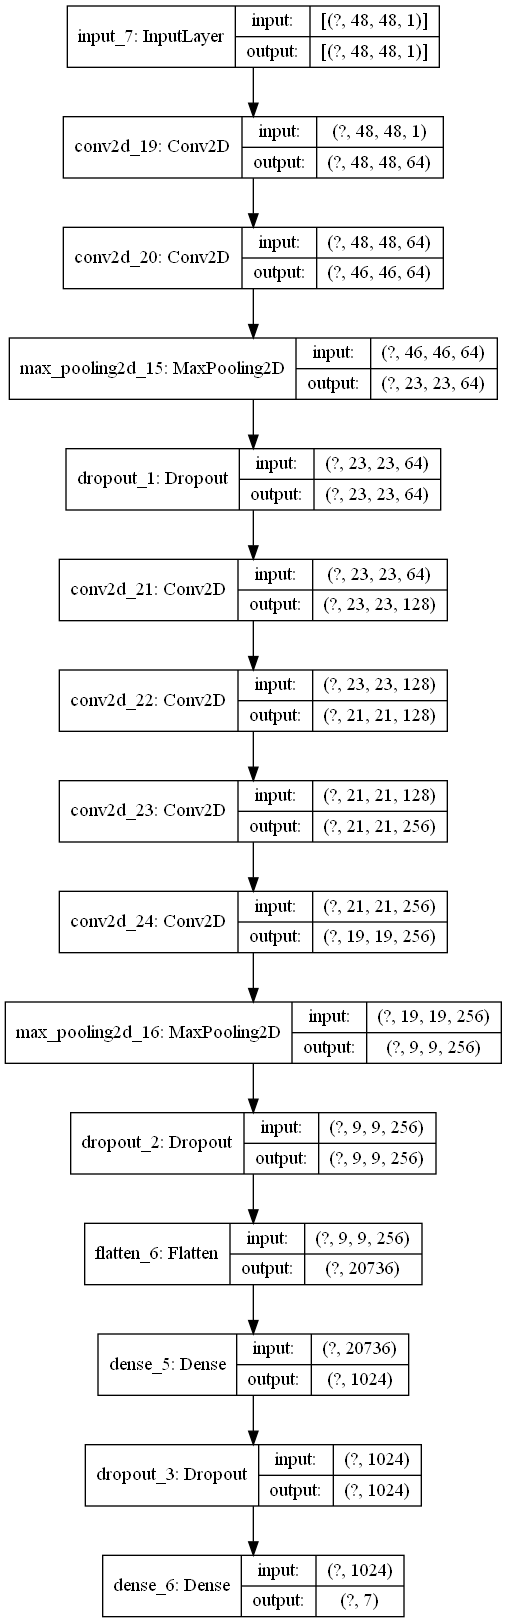

In [76]:
adam = keras.optimizers.Adam(lr=0.0001)
model12.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = adam,metrics=['accuracy'])
keras.utils.plot_model(model12, to_file = 'model12.png', show_shapes = True, show_layer_names = True)

In [77]:
EPOCHS = 20
history = model12.fit(
        train_generator,
        batch_size=128,
        epochs = EPOCHS,
        validation_data = validation_generator,
        callbacks=call_back
        )

Epoch 1/20
727/727 [==============================] - ETA: 0s - loss: 1.9886 - accuracy: 0.3379
Epoch 00001: val_accuracy did not improve from 0.69564
727/727 [==============================] - 832s 1s/step - loss: 1.9886 - accuracy: 0.3379 - val_loss: 1.4376 - val_accuracy: 0.5099
Epoch 2/20
727/727 [==============================] - ETA: 0s - loss: 1.3397 - accuracy: 0.5528
Epoch 00002: val_accuracy did not improve from 0.69564
727/727 [==============================] - 735s 1s/step - loss: 1.3397 - accuracy: 0.5528 - val_loss: 1.1994 - val_accuracy: 0.6129
Epoch 3/20
727/727 [==============================] - ETA: 0s - loss: 1.1616 - accuracy: 0.6288
Epoch 00003: val_accuracy did not improve from 0.69564
727/727 [==============================] - 842s 1s/step - loss: 1.1616 - accuracy: 0.6288 - val_loss: 1.0577 - val_accuracy: 0.6838
Epoch 4/20
727/727 [==============================] - ETA: 0s - loss: 1.0429 - accuracy: 0.6875
Epoch 00004: val_accuracy improved from 0.69564 to 0.71

In [78]:
hist=model12.evaluate(test_generator)

55/55 [==============================] - 10s 187ms/step - loss: 1.3941 - accuracy: 0.7439


In [84]:
from datetime import datetime
now = datetime.now()
dt = now.strftime("%H%M-%d%m")
model12.save(str(int(hist[1]*100))+'model'+dt+'.h5')

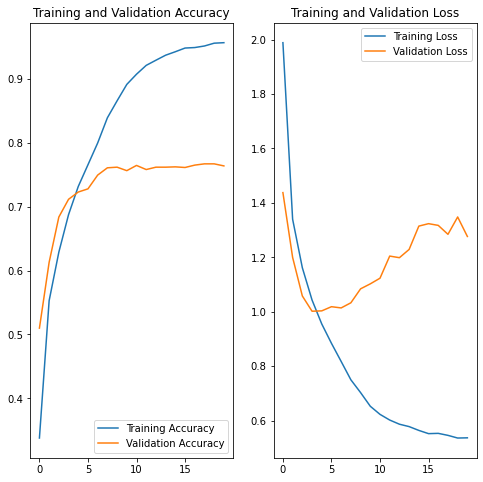

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [86]:
Y_pred = model12.predict(test_generator, test_generator.n // BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)

Confusion Matrix


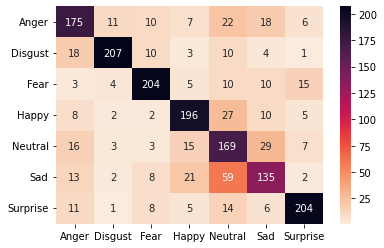

In [87]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm=confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm,annot=True,fmt="d",xticklabels=list(test_generator.class_indices.keys()),yticklabels=list(test_generator.class_indices.keys()),cmap=sns.cm.rocket_r)
plt.show()

Confusion Matrix


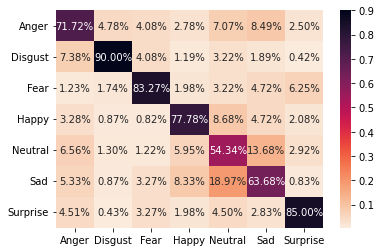

In [88]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm=confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm/np.sum(cm,axis=0),annot=True,fmt=".2%",xticklabels=list(test_generator.class_indices.keys()),yticklabels=list(test_generator.class_indices.keys()),cmap=sns.cm.rocket_r)
plt.show()

In [89]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))

Classification Report
              precision    recall  f1-score   support

       Anger       0.72      0.70      0.71       249
     Disgust       0.90      0.82      0.86       253
        Fear       0.83      0.81      0.82       251
       Happy       0.78      0.78      0.78       250
     Neutral       0.54      0.70      0.61       242
         Sad       0.64      0.56      0.60       240
    Surprise       0.85      0.82      0.83       249

    accuracy                           0.74      1734
   macro avg       0.75      0.74      0.74      1734
weighted avg       0.75      0.74      0.75      1734



## Video Capturing & Detection

In [3]:
model = load_model('77model1743-0604.h5')
model_json = model.to_json()
with open("detect.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("detect.h5")
print("Saved model to disk")

Saved model to disk


In [4]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import model_from_json
face_haar_cascade = cv2.CascadeClassifier('haar.xml')

In [5]:
model = model_from_json(open("detect.json", "r").read())
model.load_weights('detect.h5')

In [7]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    res,frame=cap.read()
    height, width , channel = frame.shape
    # Creating an Overlay window to write prediction and cofidence
    sub_img = frame[0:int(height/8),0:int(width)]
    black_rect = np.ones(sub_img.shape, dtype=np.uint8)*0
    res = cv2.addWeighted(sub_img, 0.7, black_rect,0.23, 0)
    FONT = cv2.FONT_HERSHEY_SIMPLEX
    FONT_SCALE = 0.8
    FONT_THICKNESS = 2
    lable_color = (10, 210, 10)
    lable = "Facial Emotion Detection"
    lable_dimension = cv2.getTextSize(lable,FONT ,FONT_SCALE,FONT_THICKNESS)[0]
    textX = int((res.shape[1] - lable_dimension[0]) / 2)
    textY = int((res.shape[0] + lable_dimension[1]) / 2)
    cv2.putText(res, lable, (textX,textY), FONT, FONT_SCALE, lable_color, FONT_THICKNESS)
    gray_image= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_haar_cascade.detectMultiScale(gray_image )
    try:
        for (x,y, w, h) in faces:
            cv2.rectangle(frame, pt1 = (x,y),pt2 = (x+w, y+h), color = (255,0,0),thickness =  2)
            roi_gray = gray_image[y-5:y+h+5,x-5:x+w+5]
            roi_gray=cv2.resize(roi_gray,(48,48))
            image_pixels = img_to_array(roi_gray)
            image_pixels = np.expand_dims(image_pixels, axis = 0)
            image_pixels /= 255
            predictions = model.predict(image_pixels)
            max_index = np.argmax(predictions[0])
            emotion_detection = ('Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise')
            emotion_prediction = emotion_detection[max_index]
            label_text=f"{emotion_prediction}"+' '+str(np.round(np.max(predictions[0])*100,1))+ "%"
            cv2.putText(frame,label_text,(x,y-5),FONT,0.5,lable_color,1)
    except :
        pass
    frame[0:int(height/8),0:int(width)] = res
    cv2.imshow('Facial Emotion Detection By Md Ishtiyaque', frame)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Experimenting with Models

In [27]:
inp = keras.layers.Input(shape = (48, 48, 1))

res=keras.layers.Conv2D(64, (3,3), activation = 'relu')(inp)
res=keras.layers.Conv2D(64, (3,3), activation = 'relu')(res)
#res=keras.layers.MaxPooling2D((2, 2))(res)
res=keras.layers.Dropout(0.25)(res)

res=keras.layers.Conv2D(128, (3,3), activation = 'relu')(res)
res=keras.layers.Conv2D(128, (3,3), activation = 'relu')(res)
res=keras.layers.MaxPooling2D((2, 2))(res)

res=keras.layers.Conv2D(256, (3,3), activation = 'relu')(res)
res=keras.layers.Conv2D(256, (3,3), activation = 'relu')(res)
res=keras.layers.MaxPooling2D((2, 2))(res)
res=keras.layers.Dropout(0.25)(res)

res=keras.layers.Conv2D(512, (3,3), activation = 'relu')(res)
res=keras.layers.Conv2D(512, (3,3), activation = 'relu')(res)
res=keras.layers.MaxPooling2D((2, 2))(res)
res=keras.layers.Dropout(0.25)(res)


#res=keras.layers.Dropout(0.25)(res)

res=keras.layers.Flatten()(res)
res=keras.layers.Dense(512,activation='relu')(res)
res=keras.layers.Dropout(0.2)(res)
out=keras.layers.Dense(train_generator.num_classes,activation='softmax')(res)
expmodel=keras.models.Model(inputs=inp,outputs=out)

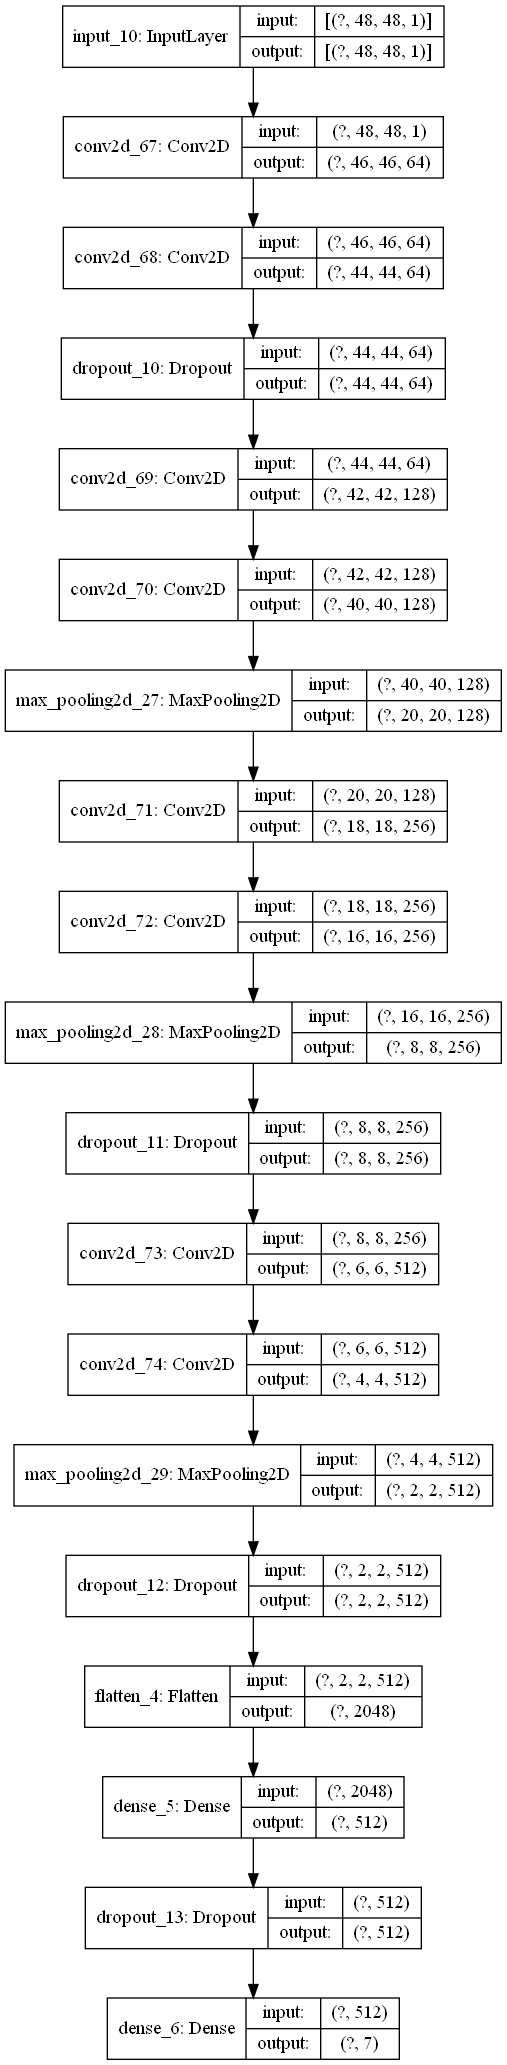

In [28]:
adam = keras.optimizers.Adam(lr=0.0001)
expmodel.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = adam,metrics=['accuracy'])
keras.utils.plot_model(expmodel, to_file = 'expmodel.png', show_shapes = True, show_layer_names = True)

In [22]:
#expmodel = load_model('74model0316-0404.h5')

In [34]:
EPOCHS = 10
history = expmodel.fit(
        train_generator,
        epochs = EPOCHS,
        batch_size = 128,
        validation_data = validation_generator
        )

Epoch 1/10
727/727 [==============================] - 928s 1s/step - loss: 0.3045 - accuracy: 0.8886 - val_loss: 0.7022 - val_accuracy: 0.7793
Epoch 2/10
727/727 [==============================] - 945s 1s/step - loss: 0.2424 - accuracy: 0.9121 - val_loss: 0.7463 - val_accuracy: 0.7764
Epoch 3/10
727/727 [==============================] - 950s 1s/step - loss: 0.1959 - accuracy: 0.9314 - val_loss: 0.8337 - val_accuracy: 0.7870
Epoch 4/10
727/727 [==============================] - 956s 1s/step - loss: 0.1757 - accuracy: 0.9366 - val_loss: 0.8227 - val_accuracy: 0.7811
Epoch 5/10
727/727 [==============================] - 936s 1s/step - loss: 0.1542 - accuracy: 0.9451 - val_loss: 0.8411 - val_accuracy: 0.7793
Epoch 6/10
727/727 [==============================] - 972s 1s/step - loss: 0.1366 - accuracy: 0.9530 - val_loss: 0.8520 - val_accuracy: 0.7769
Epoch 7/10
560/727 [======================>.......] - ETA: 3:46 - loss: 0.1177 - accuracy: 0.9571

KeyboardInterrupt: 

In [35]:
hist=expmodel.evaluate(test_generator)

127/127 [==============================] - 30s 234ms/step - loss: 0.9068 - accuracy: 0.7774


In [36]:
from datetime import datetime
now = datetime.now()
dt = now.strftime("%H%M-%d%m")
name=str(int(hist[1]*100))+'model'+dt+'.h5'
expmodel.save(name)
print("Saved Model No.:- ",name)

Saved Model No.:-  77model1743-0604.h5


In [38]:
Y_pred = expmodel.predict(test_generator, test_generator.n // BATCH_SIZE)
y_pred = np.argmax(Y_pred, axis=1)

Confusion Matrix


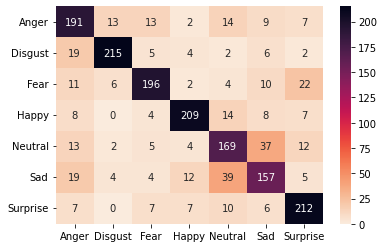

In [39]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm=confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm,annot=True,fmt="d",xticklabels=list(test_generator.class_indices.keys()),yticklabels=list(test_generator.class_indices.keys()),cmap=sns.cm.rocket_r)
plt.show()

Confusion Matrix


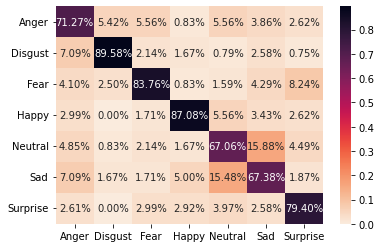

In [40]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
cm=confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm/np.sum(cm,axis=0),annot=True,fmt=".2%",xticklabels=list(test_generator.class_indices.keys()),yticklabels=list(test_generator.class_indices.keys()),cmap=sns.cm.rocket_r)
plt.show()

In [41]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))

Classification Report
              precision    recall  f1-score   support

       Anger       0.71      0.77      0.74       249
     Disgust       0.90      0.85      0.87       253
        Fear       0.84      0.78      0.81       251
       Happy       0.87      0.84      0.85       250
     Neutral       0.67      0.70      0.68       242
         Sad       0.67      0.65      0.66       240
    Surprise       0.79      0.85      0.82       249

    accuracy                           0.78      1734
   macro avg       0.78      0.78      0.78      1734
weighted avg       0.78      0.78      0.78      1734



# Prediction

In [7]:
from tensorflow.keras.models import model_from_json
model = model_from_json(open("detect.json", "r").read())
model.load_weights('detect.h5')

(32, 48, 48, 1)


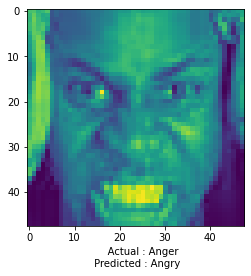

(32, 48, 48, 1)


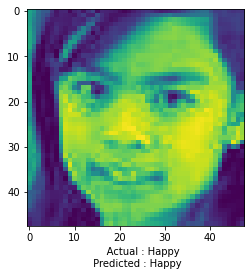

(32, 48, 48, 1)


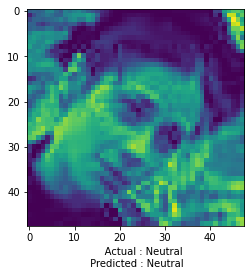

(32, 48, 48, 1)


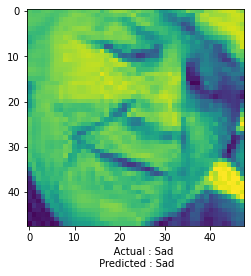

(32, 48, 48, 1)


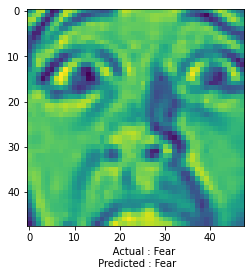

In [31]:
labels=list(test_generator.class_indices.keys())
for _ in range(5):
    temp=train_generator.next()
    img, label = temp
    print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0]) #0,1,2,...,32 (batch size) 
    #print(temp)
    exp_img=np.expand_dims(img[0], axis = 0)
    pred_y=model.predict(exp_img)
    emos = ('Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise')
    plt.xlabel("     Actual : "+labels[label[0].argmax()]+'\n Predicted : '+emos[pred_y[0].argmax()])
    plt.show()